In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import chess.pgn
import seaborn as sns
import chessdotcom as chess
from matplotlib import pyplot as plt
from scipy import stats as stats
from statsmodels.formula.api import ols


In [2]:
chess_com = pd.read_csv('Data/games.csv')
kaggle = pd.read_csv('Data/club_games_data.csv')
caissabase = pd.read_csv('Data/chessdb.csv')
elo = pd.read_csv('Data/elo.csv') 

In [ ]:
pgn = open('Data/chessdb.pgn', encoding='utf-8')
header_list = []

# while len(header_list) < 1000:
while True:
    game = chess.pgn.read_headers(pgn)
    if(game is None):
        break
    header_list.append(game)


In [ ]:
print(header_list[0])

In [ ]:
data = []
for header in header_list:
    json = {'Black': header.get('Black'), 'White': header.get('White'),
            'BlackElo': header.get('BlackElo'), 'WhiteElo': header.get('WhiteElo'), 'Result': header.get('Result')}
    data.append(json)

data = pd.DataFrame(data)
data.dropna(inplace=True)

data['Result'].loc[data['Result'] == '0-1'] = 'Black'
data['Result'].loc[data['Result'] == '1-0'] = 'White'
data['Result'].loc[data['Result'] == '1/2-1/2'] = 'Draw'

data['Black'] = data['Black'].astype(str)
data['White'] = data['White'].astype(str)
data['Result'] = data['Result'].astype(str)

data['BlackElo'] = data['BlackElo'].astype(int)
data['WhiteElo'] = data['WhiteElo'].astype(int)

elos = pd.DataFrame(
    pd.concat([data['BlackElo'], data['WhiteElo']]), columns=['Elo'])

data.to_csv('chessdb.csv')
elos.to_csv('elo.csv')
#sns.displot(data=elos, kde= True)


In [6]:
kaggle.head()
kaggle = kaggle.drop(columns=['white_id', 'black_id', 'fen', 'pgn'])
kaggle.dropna(inplace=True)
kaggle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 66879 entries, 0 to 66878
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   white_username  66879 non-null  object
 1   black_username  66879 non-null  object
 2   white_rating    66879 non-null  int64 
 3   black_rating    66879 non-null  int64 
 4   white_result    66879 non-null  object
 5   black_result    66879 non-null  object
 6   time_class      66879 non-null  object
 7   time_control    66879 non-null  object
 8   rules           66879 non-null  object
 9   rated           66879 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 5.2+ MB


In [7]:
def check(value):
    black = {'resigned', 'timeout', 'checkmated'}
    draw = {'repition', 'stalemate', 'agreed', 'insufficient', 'timevsinsufficient', '50move'}
    if value == 'win':
        return 'White'
    if value == 'abandoned':
        return '*'
    if value in black:
        return 'Black'
    if value in draw:
        return 'Draw'
    else: 
        return '*'

kaggle = kaggle.loc[kaggle['rules'] == 'chess']
kaggle = kaggle.loc[kaggle['rated'] == True]

ratings = pd.concat([kaggle['white_rating'],
                    kaggle['black_rating']])

kaggle['Result'] = kaggle['white_result'].copy()
kaggle['Result'] = kaggle['Result'].apply(check)




In [8]:
chess_com.drop(columns=['id', 'moves', 'opening_eco',
               'opening_name', 'opening_ply'], inplace=True)

In [9]:
chess_com.rename(columns={'winner': 'Result'}, inplace=True)
chess_com['Result'] = chess_com['Result'].apply(str.capitalize)
chess_com = chess_com[chess_com['rated'] != False]
chess_com.head()

,rated,created_at,last_move_at,turns,victory_status,Result,increment_code,white_id,white_rating,black_id,black_rating
1,True,1.504130e+12,1.504130e+12,16,resign,Black,5+10,a-00,1322,skinnerua,1261
2,True,1.504130e+12,1.504130e+12,61,mate,White,5+10,ischia,1496,a-00,1500
3,True,1.504110e+12,1.504110e+12,61,mate,White,20+0,daniamurashov,1439,adivanov2009,1454
4,True,1.504030e+12,1.504030e+12,95,mate,White,30+3,nik221107,1523,adivanov2009,1469
6,True,1.504230e+12,1.504230e+12,33,resign,White,10+0,capa_jr,1520,daniel_likes_chess,1423


White    0.377236
Draw     0.328831
Black    0.293933
Name: Result, dtype: float64

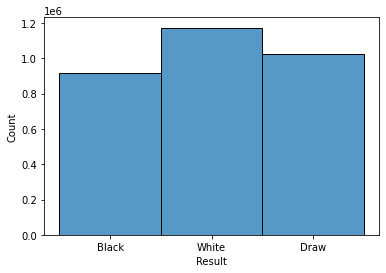

In [10]:
caissabase = caissabase[caissabase['Result'] != '*']
sns.histplot(caissabase['Result'])
caissabase['Result'].value_counts(normalize=True)

White    0.498422
Black    0.457072
Draw     0.044506
Name: Result, dtype: float64

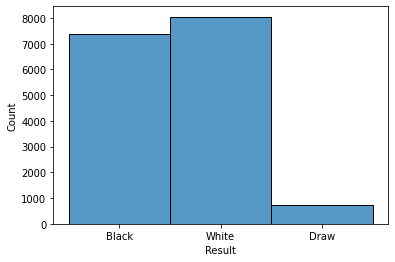

In [11]:
sns.histplot(chess_com['Result'])
chess_com['Result'].value_counts(normalize=True)


In [12]:
nepo = caissabase[(caissabase['Black'] == 'Nepomniachtchi, I') | (caissabase['White'] == 'Nepomniachtchi, I')].copy()
caruana = caissabase[(caissabase['Black'] == 'Caruana, Fabiano') | (caissabase['White'] == 'Nepomniachtchi, I')].copy()
carlsen = caissabase[(caissabase['Black'] == 'Carlsen, Magnus') | (caissabase['White'] == 'Carlsen, Magnus')].copy()
grischuk = caissabase[(caissabase['Black'] == 'Grischuk, Alexander') | (caissabase['White'] == 'Grischuk, Alexander')].copy()
anand = caissabase[(caissabase['Black'] == 'Anand, Viswanathan') | (caissabase['White'] == 'Anand, Viswanathan')].copy()



In [13]:
nepo['Color'] = nepo['Black'].apply(
    lambda x: 'Black' if x == 'Nepomniachtchi, I' else 'White')
caruana['Color'] = caruana['Black'].apply(
    lambda x: 'Black' if x == 'Caruana, Fabiano' else 'White')
carlsen['Color'] = carlsen['Black'].apply(
    lambda x: 'Black' if x == 'Carlsen, Magnus' else 'White')
grischuk['Color'] = grischuk['Black'].apply(
    lambda x: 'Black' if x == 'Grischuk, Alexander' else 'White')
anand['Color'] = anand['Black'].apply(
    lambda x: 'Black' if x == 'Anand, Viswanathan' else 'White')


In [14]:
nepo_cross = pd.crosstab(nepo['Color'], nepo['Result'])
caru_cross = pd.crosstab(caruana['Color'], caruana['Result'])
carl_cross = pd.crosstab(carlsen['Color'], carlsen['Result'])
gris_cross = pd.crosstab(grischuk['Color'], grischuk['Result'])
anan_cross = pd.crosstab(anand['Color'], anand['Result'])
player_cross = [nepo_cross, caru_cross, carl_cross, gris_cross, anan_cross]

for x in range(len(player_cross)):
    tstat, p_val, dof, expected = stats.chi2_contingency(player_cross[x])
    print(str(p_val) + '\n' + str(expected) + '\n' + str(player_cross[x]))


7.90620964952745e-09
[[ 93.99736148 145.94327177 135.05936675]
 [ 96.00263852 149.05672823 137.94063325]]
Result  Black  Draw  White
Color                     
Black     124   151    100
White      66   144    173
4.733382917823222e-14
[[295.11048557 425.86488388 317.02463054]
 [108.88951443 157.13511612 116.97536946]]
Result  Black  Draw  White
Color                     
Black     338   439    261
White      66   144    173
5.641294981621431e-77
[[318.22761943 484.00200723 426.77037334]
 [326.77238057 496.99799277 438.22962666]]
Result  Black  Draw  White
Color                     
Black     467   543    219
White     178   438    646
4.423142147249426e-50
[[301.38083363 638.56929106 456.04987531]
 [304.61916637 645.43070894 460.95012469]]
Result  Black  Draw  White
Color                     
Black     417   695    284
White     189   589    633
9.325652752105006e-84
[[344.19232923 896.38577828 528.4218925 ]
 [350.80767077 913.61422172 538.5781075 ]]
Result  Black  Draw  White
Color  

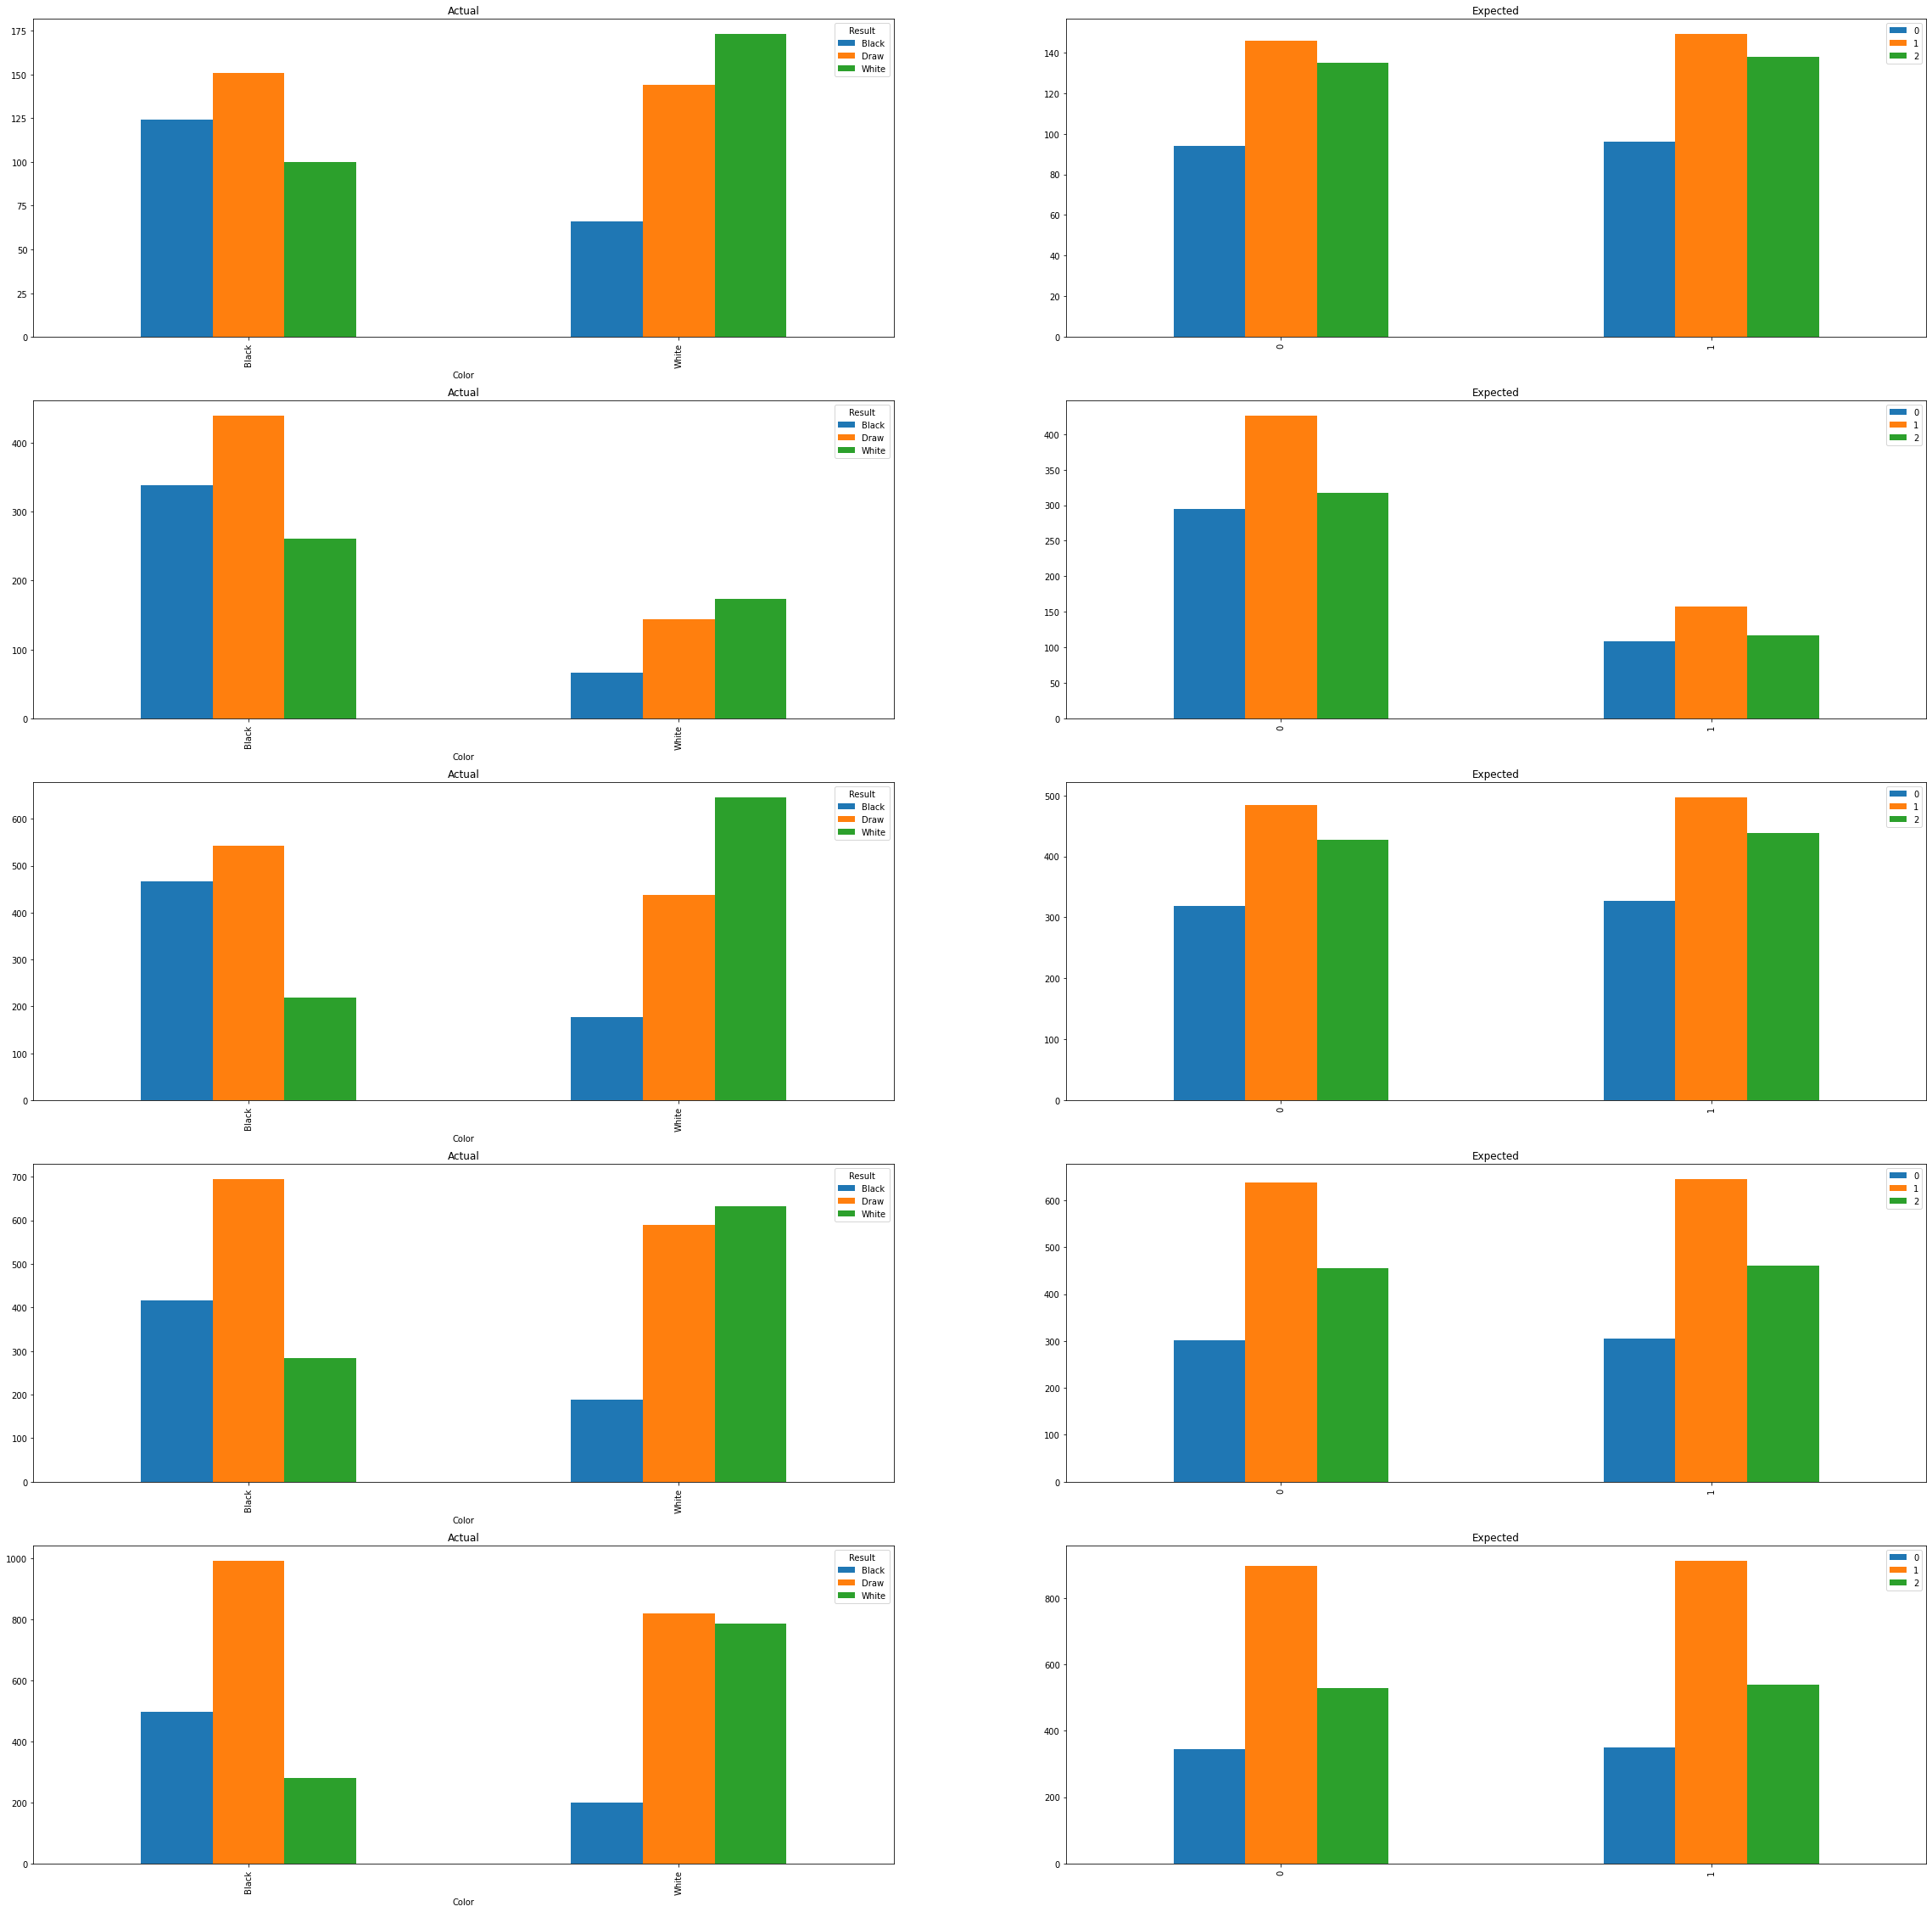

In [15]:
fig, ax = plt.subplots(5, 2, figsize=(40, 40))
for x in range(len(player_cross)):
    tstat, p_val, dof, expected = stats.chi2_contingency(player_cross[x])
    pd.DataFrame(player_cross[x]).plot(ax=ax[x, 0], kind='bar', title='Actual')
    pd.DataFrame(expected).plot(ax=ax[x, 1], kind='bar', title='Expected')

In [16]:
chess_com['time_control'] = chess_com['increment_code'].copy()
chess_com['increment_code'].value_counts()
chess_com['time_control'] = chess_com['time_control'].str.split('+').str[0]
chess_com['time_control'] = pd.to_numeric(chess_com['time_control'])
chess_com.loc[(chess_com['time_control'] <= 10), 'time_control_str'] = 'Blitz'
chess_com.loc[(chess_com['time_control'] > 10), 'time_control_str'] = 'Standard'

0.0008723005252924094
14.088753108665813
[[5179.54119468  504.3458991  5648.11290622]
 [2204.45880532  214.6541009  2403.88709378]]
Result            Black  Draw  White
time_control_str                    
Blitz              5236   462   5634
Standard           2148   257   2418


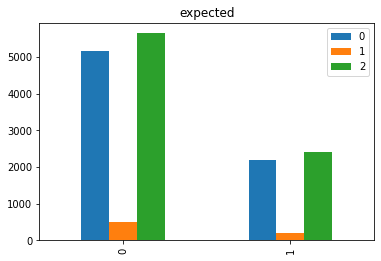

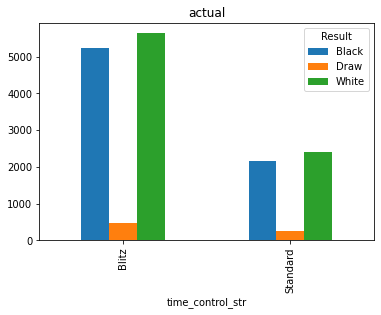

In [17]:
time_control_results = pd.crosstab(
    chess_com['time_control_str'], chess_com['Result'])
tstat, p_val, dof, expected = stats.chi2_contingency(time_control_results)
pd.DataFrame(expected).plot(kind='bar', title='expected')
pd.DataFrame(time_control_results).plot(kind='bar', title='actual')
print(p_val)
print(tstat)
print(expected)
print(time_control_results)


In [18]:
chess_com.head()
chess_com.rename(columns={'black_id': 'Black', 'white_id': 'White',	'black_rating': 'BlackElo',	'white_rating':'WhiteElo'}, inplace=True)
chess_com.loc[chess_com['Result'] == 'Black','Winner_Elo'] = chess_com['BlackElo']
chess_com.loc[chess_com['Result'] == 'White','Winner_Elo'] = chess_com['WhiteElo']
chess_com.loc[chess_com['Result'] == 'Draw', 'Winner_Elo'] = 0
chess_com['Black'] = chess_com['Black'].astype(str)
chess_com['White'] = chess_com['White'].astype(str)
chess_com['Result'] = chess_com['Result'].astype(str)

chess_com['BlackElo'] = chess_com['BlackElo'].astype(int)
chess_com['WhiteElo'] = chess_com['WhiteElo'].astype(int)
chess_com.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 1 to 20057
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rated             16155 non-null  bool   
 1   created_at        16155 non-null  float64
 2   last_move_at      16155 non-null  float64
 3   turns             16155 non-null  int64  
 4   victory_status    16155 non-null  object 
 5   Result            16155 non-null  object 
 6   increment_code    16155 non-null  object 
 7   White             16155 non-null  object 
 8   WhiteElo          16155 non-null  int32  
 9   Black             16155 non-null  object 
 10  BlackElo          16155 non-null  int32  
 11  time_control      16155 non-null  int64  
 12  time_control_str  16155 non-null  object 
 13  Winner_Elo        16155 non-null  float64
dtypes: bool(1), float64(3), int32(2), int64(2), object(6)
memory usage: 2.1+ MB


In [19]:
caissabase.drop('Unnamed: 0', axis=1, inplace=True)
caissabase.loc[caissabase['Result'] == 'Black', 'Winner_Elo'] = caissabase['BlackElo'] 
caissabase.loc[caissabase['Result'] == 'White', 'Winner_Elo'] = caissabase['WhiteElo']
caissabase.loc[caissabase['Result'] == 'Draw','Winner_Elo'] = 0

#this is an assumption
caissabase['time_control_str'] = 'Standard'
caissabase.head()


,Black,White,BlackElo,WhiteElo,Result,Winner_Elo,time_control_str
0,"Guseva, Marina","Markelova, L",2409,2190,Black,2409.0,Standard
1,"Shariyazdanov, A","Ozgibcev, A",2526,2368,White,2368.0,Standard
2,"Linker, M","Moiseenko, Va",2269,2492,Draw,0.0,Standard
3,"Nepomniachtchi, I","Tekeyev, Z",2759,2392,Black,2759.0,Standard
4,"Drozdova, D","Guseva, Marina",2183,2409,Draw,0.0,Standard


In [24]:
kaggle.rename(columns={'white_username': 'Black', 'black_username': 'White',
                       'black_rating': 'BlackElo', 'white_rating': 'WhiteElo'}, inplace=True)
kaggle.loc[kaggle['Result'] == 'Black',
           'Winner_Elo'] = kaggle['BlackElo']
kaggle.loc[kaggle['Result'] == 'White',
           'Winner_Elo'] = kaggle['WhiteElo']
kaggle.loc[kaggle['Result'] == 'Draw', 'Winner_Elo'] = 0


,Black,White,WhiteElo,BlackElo,white_result,black_result,time_class,time_control,rules,rated,Result,Winner_Elo
0,-Amos-,miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,White,1708.0
1,-Amos-,koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,White,1726.0
2,-Amos-,enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,White,1727.0
3,enhmandah,-Amos-,819,1727,checkmated,win,daily,1/172800,chess,True,Black,1727.0
4,-Amos-,Shalllow-Blue,1729,1116,win,resigned,daily,1/172800,chess,True,White,1729.0


In [56]:
concat = pd.concat([caissabase,chess_com], axis=0, join='inner')
concat.head()
concat.reset_index(inplace=True)
concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127486 entries, 0 to 3127485
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   index             int64  
 1   Black             object 
 2   White             object 
 3   BlackElo          int64  
 4   WhiteElo          int64  
 5   Result            object 
 6   Winner_Elo        float64
 7   time_control_str  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 190.9+ MB


<AxesSubplot:title={'center':'expected'}, xlabel='Category'>

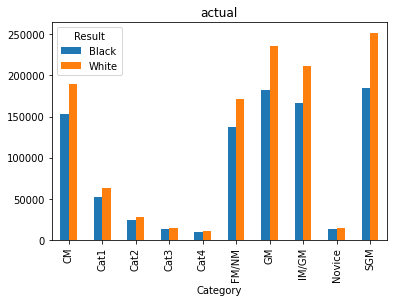

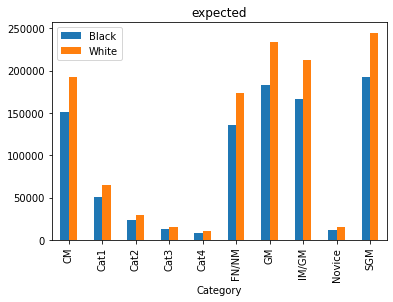

In [143]:
def categorize(value):
    if value <= 1200:
        return 'Novice'
    if value <= 1400:
        return 'Cat4'
    if value <= 1600:
        return 'Cat3'
    if value <= 1800:
        return 'Cat2'
    if value <= 2000:
        return 'Cat1'
    if value <= 2200:
        return 'CM' 
    if value <= 2300:
        return 'FM/NM'
    if value <= 2400:
        return 'IM/GM'
    if value <= 2500:
        return 'GM'
    if value <= 2700:
        return 'SGM'




concat = pd.concat([caissabase, chess_com, kaggle], axis=0, join='inner')
concat.reset_index(inplace=True)

win_lose = concat[concat['Winner_Elo'] != 0.0].copy()
win_lose['Category'] = win_lose['Winner_Elo'].apply(categorize)

cross = pd.DataFrame(pd.crosstab(win_lose['Category'], win_lose['Result']))
cross_norm = pd.DataFrame(pd.crosstab(win_lose['Category'], win_lose['Result'], margins=True, normalize='index'))
cross.plot(kind='bar', title='actual')
tstat, p_val, dof, expected = stats.chi2_contingency(cross)

expected_cross = pd.DataFrame(expected,columns=['Black', 'White'])
expected_cross['Category'] = pd.DataFrame(['CM','Cat1','Cat2','Cat3','Cat4','FN/NM','GM','IM/GM','Novice', 'SGM'])
expected_cross.plot.bar(title='expected', x='Category')
